In [1]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/oil_cleaned.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)


In [2]:
dd=G.degree
si=[]
for i in G.nodes():
  si.append(dd[i])

In [3]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [4]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0]))





node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [5]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Crude Oil Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
import matplotlib.pyplot as plt
def robustness(H,remNodes):
  #finding probability of node to be in giant component P0
  G=H.copy()
  c=nx.connected_components(G)
  c=sorted( c, key=len ,reverse=True)
  c=list(c)
  p0=len(c[0])

  #removing nodes one by one and calculating the p ratio 
  pratio=[]
  f=[]
  n=list(G.nodes)
  for i in range(len(n)-1):
      #remove node i
      G.remove_node(remNodes[i])
      c=nx.connected_components(G)
      #calculate Pi probability of node to be in giant component
      c=sorted( c, key=len ,reverse=True)
      c=list(c)
      pf=len(c[0])
      #p ratio list
      pratio.append(pf/p0)
      #fraction of nodes removed
      f.append(i/len(n))

  
  plt.plot(pratio,f)    
  plt.xlabel("f ( fraction of nodes removed) ")
  plt.ylabel("p ( f ) / p ( 0 )")    
  return pratio  

In [ ]:
#critical threshold
deg=dict(G.degree)
deg=deg.values()
k=sum(deg)/len(deg)
k2=k*(1+k)
fc=1-(1/((k2/k)-1))
fc

0.9271217712177122

[0.9935897435897436, 0.9871794871794872, 0.9807692307692307, 0.9743589743589743, 0.967948717948718, 0.9615384615384616, 0.9551282051282052, 0.9487179487179487, 0.9423076923076923, 0.9358974358974359, 0.9294871794871795, 0.9230769230769231, 0.9166666666666666, 0.9102564102564102, 0.9038461538461539, 0.8974358974358975, 0.8910256410256411, 0.8846153846153846, 0.8782051282051282, 0.8717948717948718, 0.8653846153846154, 0.8589743589743589, 0.8525641025641025, 0.8461538461538461, 0.8397435897435898, 0.8333333333333334, 0.8269230769230769, 0.8205128205128205, 0.8141025641025641, 0.8076923076923077, 0.8012820512820513, 0.7948717948717948, 0.7884615384615384, 0.782051282051282, 0.7756410256410257, 0.7692307692307693, 0.7628205128205128, 0.7564102564102564, 0.75, 0.7371794871794872, 0.7307692307692307, 0.7243589743589743, 0.717948717948718, 0.7115384615384616, 0.7051282051282052, 0.6987179487179487, 0.6923076923076923, 0.6858974358974359, 0.6794871794871795, 0.6730769230769231, 0.66666666666666

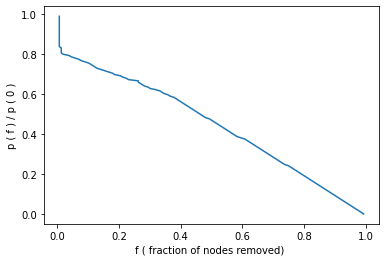

In [ ]:
#removing nodes accoring to clustering coeffecient 
#this returns clustering coeff of every node
l=nx.clustering(G)
l=list(zip(l.keys(),l.values()))
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes1=list(l.keys())


pratio1=robustness(G,remNodes1)
print(pratio1)

[0.9807692307692307, 0.967948717948718, 0.9487179487179487, 0.9423076923076923, 0.9294871794871795, 0.9230769230769231, 0.9102564102564102, 0.9038461538461539, 0.8910256410256411, 0.8782051282051282, 0.8589743589743589, 0.8461538461538461, 0.8333333333333334, 0.8012820512820513, 0.7948717948717948, 0.7884615384615384, 0.782051282051282, 0.7692307692307693, 0.75, 0.7371794871794872, 0.717948717948718, 0.7115384615384616, 0.6987179487179487, 0.6858974358974359, 0.6666666666666666, 0.6474358974358975, 0.6410256410256411, 0.6282051282051282, 0.6217948717948718, 0.6089743589743589, 0.6025641025641025, 0.5961538461538461, 0.5897435897435898, 0.5769230769230769, 0.5705128205128205, 0.5641025641025641, 0.5448717948717948, 0.5128205128205128, 0.48717948717948717, 0.34615384615384615, 0.32051282051282054, 0.32051282051282054, 0.3141025641025641, 0.3076923076923077, 0.3076923076923077, 0.2692307692307692, 0.2692307692307692, 0.2692307692307692, 0.2692307692307692, 0.26282051282051283, 0.256410256

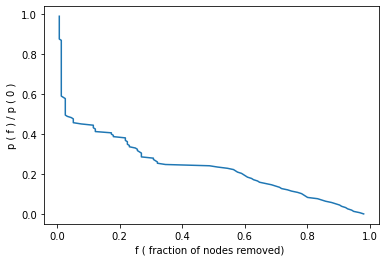

In [ ]:


#removing nodes accoring to degree
#this returns degree of every node
l=list(G.degree())
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes2=list(l.keys())


pratio2=robustness(G,remNodes2)
print(pratio2)

[0.9935897435897436, 0.9871794871794872, 0.967948717948718, 0.9423076923076923, 0.9294871794871795, 0.9166666666666666, 0.9038461538461539, 0.8974358974358975, 0.8910256410256411, 0.8653846153846154, 0.8525641025641025, 0.8333333333333334, 0.8269230769230769, 0.8141025641025641, 0.8076923076923077, 0.8012820512820513, 0.7884615384615384, 0.7756410256410257, 0.7628205128205128, 0.7435897435897436, 0.7243589743589743, 0.717948717948718, 0.7051282051282052, 0.6858974358974359, 0.6730769230769231, 0.6666666666666666, 0.6602564102564102, 0.6538461538461539, 0.6474358974358975, 0.6346153846153846, 0.6217948717948718, 0.6153846153846154, 0.6025641025641025, 0.5961538461538461, 0.5961538461538461, 0.5961538461538461, 0.5833333333333334, 0.5641025641025641, 0.5384615384615384, 0.532051282051282, 0.5064102564102564, 0.5, 0.4935897435897436, 0.4935897435897436, 0.48717948717948717, 0.4551282051282051, 0.44871794871794873, 0.4230769230769231, 0.41025641025641024, 0.40384615384615385, 0.32692307692

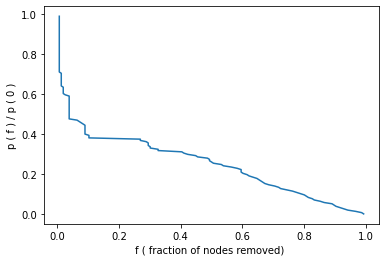

In [ ]:
l=nx.pagerank(G,alpha=0.9)
l=list(zip(l.keys(),l.values()))
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes3=list(l.keys())


pratio3=robustness(G,remNodes3)
print(pratio3)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/petrol.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)


In [ ]:
dd=G.degree
si=[]
for i in G.nodes():
  si.append(dd[i])

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0]))





node_trace.marker.color = node_adjacencies
node_trace.text = node_text
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Petroleum Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
#critical threshold
deg=dict(G.degree)
deg=deg.values()
k=sum(deg)/len(deg)
k2=k*(1+k)
fc=1-(1/((k2/k)-1))
fc


0.9814970563498738

[0.9954545454545455, 0.990909090909091, 0.9863636363636363, 0.9818181818181818, 0.9772727272727273, 0.9727272727272728, 0.9681818181818181, 0.9636363636363636, 0.9590909090909091, 0.9545454545454546, 0.95, 0.9454545454545454, 0.9409090909090909, 0.9363636363636364, 0.9318181818181818, 0.9272727272727272, 0.9227272727272727, 0.9181818181818182, 0.9136363636363637, 0.9090909090909091, 0.9045454545454545, 0.9, 0.8954545454545455, 0.8909090909090909, 0.8863636363636364, 0.8818181818181818, 0.8772727272727273, 0.8727272727272727, 0.8681818181818182, 0.8636363636363636, 0.8590909090909091, 0.8545454545454545, 0.85, 0.8454545454545455, 0.8409090909090909, 0.8363636363636363, 0.8318181818181818, 0.8272727272727273, 0.8227272727272728, 0.8181818181818182, 0.8136363636363636, 0.8090909090909091, 0.8045454545454546, 0.8, 0.7954545454545454, 0.7909090909090909, 0.7863636363636364, 0.7818181818181819, 0.7772727272727272, 0.7727272727272727, 0.7681818181818182, 0.7636363636363637, 0.759090909090909,

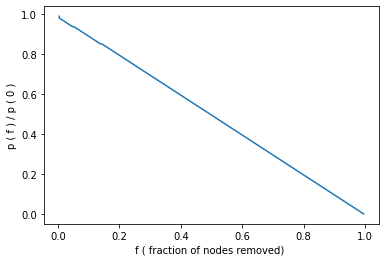

In [ ]:
#removing nodes accoring to clustering coeffecient 
#this returns clustering coeff of every node
l=nx.clustering(G)
l=list(zip(l.keys(),l.values()))
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes1=list(l.keys())


pratio1=robustness(G,remNodes1)
print(pratio1)

[0.9954545454545455, 0.990909090909091, 0.9863636363636363, 0.9818181818181818, 0.9772727272727273, 0.9727272727272728, 0.9681818181818181, 0.9636363636363636, 0.9545454545454546, 0.95, 0.9454545454545454, 0.9409090909090909, 0.9363636363636364, 0.9318181818181818, 0.9272727272727272, 0.9227272727272727, 0.9136363636363637, 0.9090909090909091, 0.8954545454545455, 0.8909090909090909, 0.8818181818181818, 0.8772727272727273, 0.8727272727272727, 0.8681818181818182, 0.8636363636363636, 0.8590909090909091, 0.8545454545454545, 0.8454545454545455, 0.8409090909090909, 0.8363636363636363, 0.8318181818181818, 0.8272727272727273, 0.8227272727272728, 0.8181818181818182, 0.8136363636363636, 0.8090909090909091, 0.8045454545454546, 0.8, 0.7954545454545454, 0.7909090909090909, 0.7863636363636364, 0.7818181818181819, 0.7772727272727272, 0.7727272727272727, 0.7681818181818182, 0.759090909090909, 0.75, 0.740909090909091, 0.7363636363636363, 0.7272727272727273, 0.7227272727272728, 0.7181818181818181, 0.713

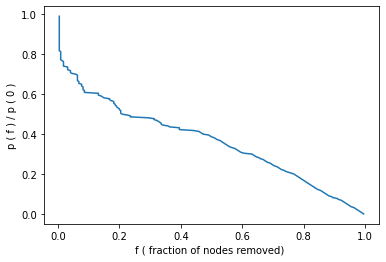

In [ ]:


#removing nodes accoring to degree
#this returns degree of every node
l=list(G.degree())
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes2=list(l.keys())


pratio2=robustness(G,remNodes2)
print(pratio2)


[0.9954545454545455, 0.990909090909091, 0.9863636363636363, 0.9818181818181818, 0.9772727272727273, 0.9727272727272728, 0.9636363636363636, 0.9590909090909091, 0.9545454545454546, 0.95, 0.9454545454545454, 0.9409090909090909, 0.9363636363636364, 0.9318181818181818, 0.9272727272727272, 0.9227272727272727, 0.9136363636363637, 0.9090909090909091, 0.9045454545454545, 0.9, 0.8954545454545455, 0.8909090909090909, 0.8772727272727273, 0.8727272727272727, 0.8681818181818182, 0.8636363636363636, 0.8590909090909091, 0.8545454545454545, 0.85, 0.8454545454545455, 0.8409090909090909, 0.8363636363636363, 0.8318181818181818, 0.8227272727272728, 0.8181818181818182, 0.8136363636363636, 0.8090909090909091, 0.8045454545454546, 0.7954545454545454, 0.7909090909090909, 0.7863636363636364, 0.7818181818181819, 0.7772727272727272, 0.7727272727272727, 0.7636363636363637, 0.759090909090909, 0.75, 0.7454545454545455, 0.740909090909091, 0.7363636363636363, 0.7318181818181818, 0.7272727272727273, 0.7227272727272728,

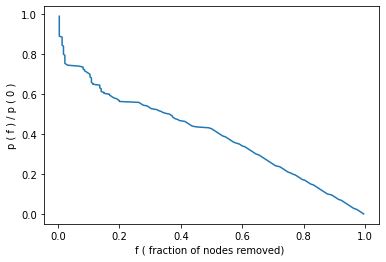

In [ ]:
l=nx.pagerank(G,alpha=0.9)
l=list(zip(l.keys(),l.values()))
l.sort(key = lambda x: x[1],reverse=True)
l=dict(l)
remNodes3=list(l.keys())


pratio3=robustness(G,remNodes3)
print(pratio3)

COMMUNITY DETECTION

In [ ]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/petrol.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)


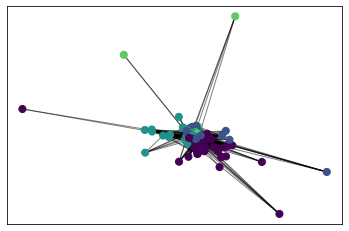

In [ ]:

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
partition  = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, 
                     cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
dd=G.degree
si=[]
for i in G.nodes():
  si.append(dd[i])

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0])+"partition:"+str(partition[adjacencies[0]]))





node_trace.marker.color = list(partition.values())
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Petroleum Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/petrol.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)


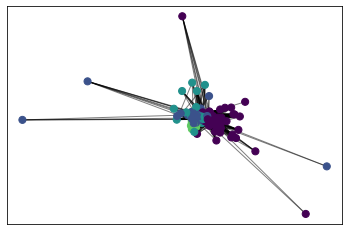

In [ ]:

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
partition  = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, 
                     cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
dd=G.degree
si=[]
for i in G.nodes():
  si.append(dd[i])

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0])+"partition:"+str(partition[adjacencies[0]]))





node_trace.marker.color = list(partition.values())
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Petroleum Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

BACKBONE STRUCTURE OF NETWORK


In [ ]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/petrol.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)

T=nx.minimum_spanning_tree(G,weight='weight')
dd=T.degree
si=[]
for i in T.nodes():
  si.append(dd[i]*10)
import plotly.graph_objects as go

import networkx as nx

G=T.copy()
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0])+ "Connected to"+ t)





node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>MST of Petrol',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

import networkx as nx
s=pd.read_csv('/content/oil_cleaned.csv')
country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

#to map code to country name creating dictionary
code=country_df['i']
name=country_df['country']
d_country=dict(zip(code,name))

exp=s['Exporter']
imp=s['Importer']
q=s['Quantity (in metric tons)']
value=s['Value of the trade flow (in thousands current USD)']

posdict=dict()
for i in range(len(s)):
  if exp[i] not in posdict:
    posdict[exp[i]]=[value[i],q[i]]
for i in range(len(s)):
  if imp[i] not in posdict:
    posdict[imp[i]]=[value[i],q[i]]




G=nx.Graph()

for i in range(len(exp)):
  G.add_node(exp[i], pos=posdict[exp[i]])
  

for i in range(len(exp)):
  G.add_node(imp[i], pos=posdict[imp[i]])

for i in range(len(s)):
  G.add_edge(exp[i],imp[i], weight=q[i])

G=nx.relabel_nodes(G,d_country)

T=nx.minimum_spanning_tree(G,weight='weight')
dd=T.degree
si=[]
for i in T.nodes():
  si.append(dd[i]*10)
import plotly.graph_objects as go

import networkx as nx

G=T.copy()
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=si,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of connections: '+str(len(adjacencies[1])) )
    t=''
    for i in adjacencies[1]:
      t=t+"\n"+str(i)
    node_text.append('country:' + str(adjacencies[0])+ "Connected to"+ t)





node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>MST of crude oil',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

**HITS** **Algo**


In [ ]:
import pandas as pd
def hitsalgo(file):
  s=pd.read_csv(file)
  country_df=pd.read_csv('/content/country_code_baci07.csv',encoding='iso-8859-1')

  #to map code to country name creating dictionary
  code=country_df['i']
  name=country_df['country']
  d_country=dict(zip(code,name))

  exp=s['i']
  imp=s['j']
  q=s['q']
  value=s['v']

  posdict=dict()
  for i in range(len(s)):
    if exp[i] not in posdict:
      posdict[exp[i]]=[value[i],q[i]]
  for i in range(len(s)):
    if imp[i] not in posdict:
      posdict[imp[i]]=[value[i],q[i]]




  import networkx as nx
  G=nx.Graph()

  for i in range(len(exp)):
    G.add_node(exp[i], pos=posdict[exp[i]])
  

  for i in range(len(exp)):
    G.add_node(imp[i], pos=posdict[imp[i]])

  for i in range(len(s)):
    G.add_edge(exp[i],imp[i], weight=q[i])

  G=nx.relabel_nodes(G,d_country)
  h,a=nx.hits(G,max_iter=300, tol=1e-08)
  hub=dict(sorted(h.items(), key=lambda x: x[1],reverse=True))    
  assoc = dict(sorted(a.items(), key=lambda x: x[1],reverse=True) )  
  l=['USA','Mexico','Russian Federation','Brazil','Germany','France','Singapore','United Kingdom','China']
  expl=[]
  impl=[]
  for i in l:
    expl.append(hub[i])
    impl.append(assoc[i])

  return expl,impl




import plotly.graph_objects as go
import glob
year = range(2007,2019)

# Add data
l=['USA','Mexico','Russian Federation','Brazil','Germany','France','Singapore','United Kingdom','China']

f=glob.glob("/content/petrol/"+"*.csv")


df=pd.DataFrame(l)
for i in range(len(f)):
  print(i)
  expo,impo=hitsalgo(f[i])
  n1=str(year[i])+'expo'
  n2=str(year[i])+'impo'
  df[n1]=expo
  df[n2]=impo
s=df.values

nam=list(s[:,0])
fig = go.Figure()
fig2 = go.Figure()

year = list(range(2007,2019))

for i in range(len(df)):
  lis=s[i,1:]
  expo = [] 
  impo = [] 
  for id in range(len(lis)): 
      if id % 2:
        expo.append(lis[id]) 
      else:
        impo.append(lis[id])
   
  fig.add_trace(go.Scatter(x=year, y=expo, name= nam[i] ))    
  fig2.add_trace(go.Scatter(x=year, y=impo, name= nam[i] ))    
  


0
1
2
3
4
5
6
7
8
9
10
11


In [ ]:
df

,0,2007expo,2007impo,2008expo,2008impo,2009expo,2009impo,2010expo,2010impo,2011expo,2011impo,2012expo,2012impo,2013expo,2013impo,2014expo,2014impo,2015expo,2015impo,2016expo,2016impo,2017expo,2017impo,2018expo,2018impo
0,USA,0.059518,0.059518,0.062729,0.062729,0.181090,0.181090,0.046919,0.046919,0.018042,0.018042,0.070145,0.070145,0.055585,0.055585,0.083840,0.083840,0.060562,0.060562,0.056546,0.056546,0.029859,0.029859,0.145663,0.145663
1,Mexico,0.028698,0.028698,0.032216,0.032216,0.150637,0.150637,0.025067,0.025067,0.011411,0.011411,0.039227,0.039227,0.021371,0.021371,0.056714,0.056714,0.032923,0.032923,0.031236,0.031236,0.014904,0.014904,0.117233,0.117233
2,Russian Federation,0.122761,0.122761,0.122877,0.122877,0.033006,0.033006,0.111695,0.111695,0.134512,0.134512,0.104944,0.104944,0.111976,0.111976,0.092893,0.092893,0.123427,0.123427,0.133141,0.133141,0.156477,0.156477,0.063304,0.063304
3,Brazil,0.009410,0.009410,0.012581,0.012581,0.040276,0.040276,0.004834,0.004834,0.003117,0.003117,0.011443,0.011443,0.004800,0.004800,0.017302,0.017302,0.010238,0.010238,0.008691,0.008691,0.007620,0.007620,0.034970,0.034970
4,Germany,0.054923,0.054923,0.053473,0.053473,0.018258,0.018258,0.066772,0.066772,0.080802,0.080802,0.053179,0.053179,0.020621,0.020621,0.039037,0.039037,0.057551,0.057551,0.061173,0.061173,0.069889,0.069889,0.029378,0.029378
5,France,0.031577,0.031577,0.035691,0.035691,0.010154,0.010154,0.031907,0.031907,0.046631,0.046631,0.038934,0.038934,0.033157,0.033157,0.025759,0.025759,0.049201,0.049201,0.029100,0.029100,0.032223,0.032223,0.022672,0.022672
6,Singapore,0.024063,0.024063,0.025603,0.025603,0.029412,0.029412,0.029541,0.029541,0.013796,0.013796,0.028576,0.028576,0.049772,0.049772,0.022053,0.022053,0.023218,0.023218,0.018458,0.018458,0.015626,0.015626,0.022092,0.022092
7,United Kingdom,0.025855,0.025855,0.026057,0.026057,0.015406,0.015406,0.036538,0.036538,0.043478,0.043478,0.028090,0.028090,0.015833,0.015833,0.031969,0.031969,0.031346,0.031346,0.023049,0.023049,0.022286,0.022286,0.017734,0.017734
8,China,0.025348,0.025348,0.022586,0.022586,0.015462,0.015462,0.024533,0.024533,0.022707,0.022707,0.028584,0.028584,0.038172,0.038172,0.025323,0.025323,0.021341,0.021341,0.024208,0.024208,0.025018,0.025018,0.020044,0.020044


In [ ]:


# Edit the layout
fig.update_layout(title='Export(hub) trend of Countries',
                   xaxis_title='Year',
                   yaxis_title='Hub Score')


fig.show()

In [ ]:


# Edit the layout
fig2.update_layout(title='Import(Authority) trend of Countries',
                   xaxis_title='Year',
                   yaxis_title='Authority Score')


fig2.show()

In [ ]:
df.columns=[         'Country', '2007expo', '2007impo', '2008expo', '2008impo', '2009expo',
       '2009impo', '2010expo', '2010impo', '2011expo', '2011impo', '2012expo',
       '2012impo', '2013expo', '2013impo', '2014expo', '2014impo', '2015expo',
       '2015impo', '2016expo', '2016impo', '2017expo', '2017impo', '2018expo',
       '2018impo']


In [ ]:
df.to_csv('/content/data.csv')